In [96]:
#KNN
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

import numpy as np

In [14]:
X, y = make_moons(n_samples = 10000, noise = 0.51)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [35]:
X_dots = np.linspace(-2, 3, 100)
y_dots = np.linspace(-2, 2, 100)
X_dots, y_dots = np.meshgrid(X_dots, y_dots)
xy_space = np.stack([X_dots, y_dots], axis = -1).reshape(100 ** 2, 2)

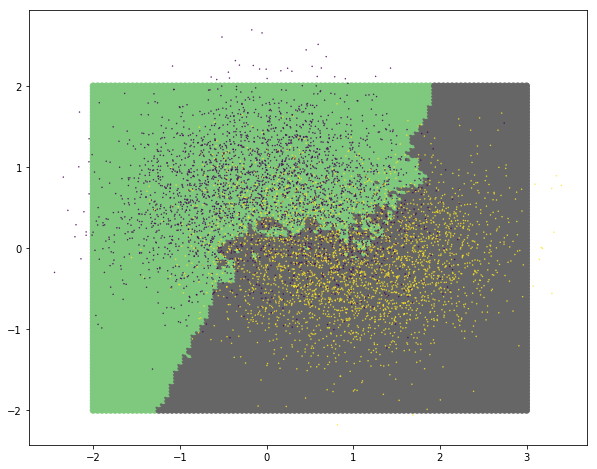

In [62]:
knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)

plt.figure(figsize = (10, 8))
plt.scatter(xy_space[:, 0], xy_space[:, 1], c = knn.predict(xy_space), cmap = plt.cm.Accent)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 0.2)

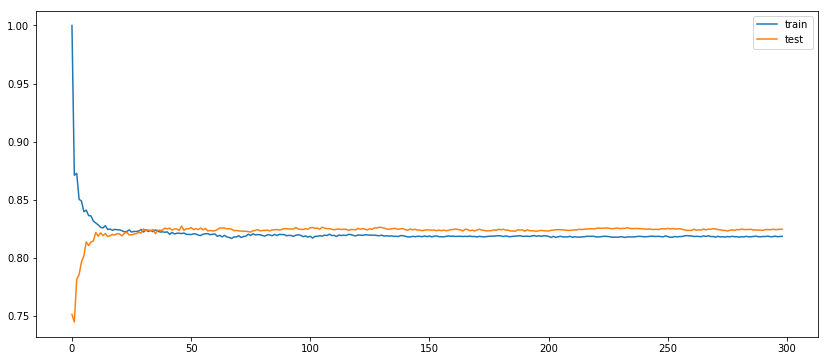

In [80]:
train_accuracy = []
test_accuracy = []
for i in range(1, 300):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.figure(figsize = (14, 6))
plt.plot(train_accuracy, label = 'train')
plt.plot(test_accuracy, label = 'test')
plt.legend()

In [81]:
gcv = GridSearchCV(knn, param_grid = {
    'n_neighbors': np.arange(1, 50)
}).fit(X_train, y_train)

c:\users\aero\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [82]:
gcv.best_params_

{'n_neighbors': 38}

In [84]:
gcv_predict = gcv.fit(X_train, y_train).predict(X_test)

c:\users\aero\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


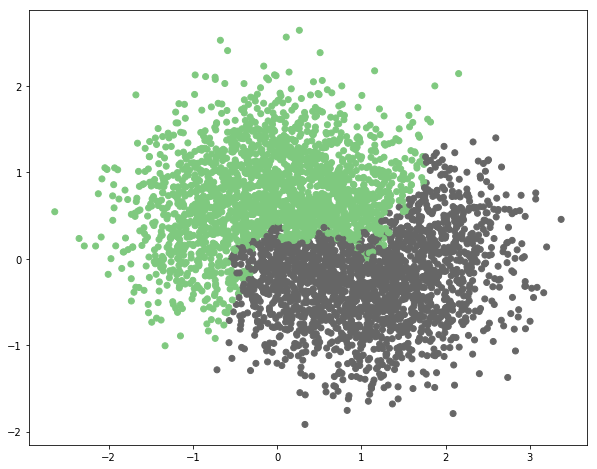

In [94]:
plt.figure(figsize = (10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c = gcv_predict, cmap = plt.cm.Accent)
#plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 0.2)

In [98]:
#KD tree
kd = KDTree(X_train)